In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a = 400 #mm, section height
b = 300 #mm, section width
c = 50  #mm, concret cover
d = a - c

As1 = 1017 # mm^2, 4 phi18, bottom rebar area
As2 = 452  #mm^2,   4phi12, top rebar area

In [4]:
# Concrete
fck = 25 #Mpa
gamma_c = 1.5
fcd = 0.85*fck/gamma_c # MPa
eps_cc = -0.0020
eps_cu = -0.0035

# stell
fyk = 450 #Mpa
gamma_s = 1.15
fyd = fyk/gamma_s #Mpa
Es = 200000 # Mpa
eps_su = 0.01
eps_y = fyd/Es
eps_y

0.001956521739130435

In [5]:
# Concret stress-strain diagram

def rel_c(eps):
    n = len(eps)
    sig = np.zeros(n)
    for i in range(n):
        if eps[i]>=0:
            sig[i] = 0
        elif 0>eps[i] and eps[i]>=eps_cc:
            sig[i] = -fcd*(2 - eps[i]/eps_cc)*eps[i]/eps_cc
        elif eps_cc>eps[i] and eps[i] >= eps_cu:
            sig[i]= - fcd
        else:
            print('invalid eps value')
    return(sig)

In [6]:
# Concret stress-strain diagram
def rel_s(eps):
    n = len(eps)
    sig =np.zeros(n)
    for i in range(n):
        if -eps_su <= eps[i] and eps[i] <= -eps_y:
            sig[i] = -fyd
        elif -eps_y < eps[i] and eps[i] <= eps_y:
            sig[i] = eps[i]*Es
        elif eps_y < eps[i] and eps[i] <= eps_su:
            sig[i] = fyd
        else:
            print('invalid eps value')
    return(sig)   

In [7]:
# Domain I
import numpy as np
# Domain I
n_step = 20

yn_sup = -9999
yn_inf =0
yn = np.linspace(yn_sup,yn_inf,n_step)
psi = eps_su/(d - yn)
eps_s1 = np.full(n_step, eps_su)
eps_s2 = - psi*(yn - c)
sig_s1 = rel_s(eps_s1)
sig_s2 = rel_s(eps_s2)

Nrd_1 = As1*sig_s1 + As2*sig_s2
Mrd_1 = As1*sig_s1*(a/2 - c) - As2*sig_s2*(a/2 - c)

In [8]:
# Domani II
yn_sup = 0.1
yn_inf = -d*eps_cu/(eps_su - eps_cu)
yn = np.linspace(yn_sup, yn_inf, n_step)
psi = eps_su/(d -yn)
eps_s1 = np.full(n_step, eps_su)
eps_s2 = -psi*(yn-c)
sig_s1 = rel_s(eps_s1)
sig_s2 = rel_s(eps_s2)

Nc = np.zeros(n_step)
Mc = np.zeros(n_step)
for i in range(n_step):
    y = np.linspace(0,yn[i],10)
    eps_c = -(yn[i]-y)*psi[i]
    eps_c = np.round(eps_c,7)
    sig_c = rel_c(eps_c)
    Nc[i] = b*np.trapz(sig_c,y)
    # ygc = np.nan_to_num(np.trapz(sig_c*y,y)/np.trapz(sig_c,y))
    ygc = np.nan_to_num(np.trapz(sig_c*y,y)/np.trapz(sig_c,y))
    Mc[i]=Nc[i]*(a/2 - ygc)

Nrd_2 = Nc+As1*sig_s1 + As2*sig_s2
Mrd_2 = -Mc + As1*sig_s1*(a/2-c) - As2*sig_s2*(a/2-c)

In [9]:
# Domani III
yn_sup = -d*eps_cu / (eps_su - eps_cu)
yn_inf = -d*eps_cu / (eps_su - eps_cu)
yn = np.linspace(yn_sup, yn_inf, n_step)
for i in range(n_step):
    y = np.linspace(0,yn[i],10)
    eps_c = - (yn[i]-y)*psi[i]
    eps_c = np.round(eps_c,7)
    sig_c = rel_c(eps_c)
    Nc[i] = b*np.trapz(sig_c,y)
    ygc = np.trapz(sig_c*y,y)/ np.trapz(sig_c,y)
    Mc[i] = Nc[i]*(a/2 - ygc)
    
Nrd_3 = Nc + As1*sig_s1 + As2*sig_s2
Mrd_3 = -Mc + As1*sig_s1*(a/2 -c) - As2*sig_s2*(a/2 - c)

In [10]:
# Domanin Iv
yn_sup = -d*eps_cu/(eps_y - eps_cu)
yn_inf =a
yn = np.linspace(yn_sup, yn_inf, n_step)
psi = -eps_cu / yn
eps_s1 = -psi*(yn-d)
eps_s2 = -psi*(yn-c)
sig_s1 = rel_s(eps_s1)
sig_s2 = rel_s(eps_s2)

Nc = np.zeros(n_step)
Mc = np.zeros(n_step)
for i in range(n_step):
    y = np.linspace(0,yn[i],10)
    eps_c = -(yn[i] - y)*psi[i]
    eps_c = np.round(eps_c,7)
    sig_c = rel_c(eps_c)
    Nc[i] = b*np.trapz(sig_c,y)
    ygc   = np.trapz(sig_c*y,y)  / np.trapz(sig_c,y)
    Mc[i] = Nc[i]*(a/2 - ygc)

Nrd_4 = Nc + As1*sig_s1 + As2*sig_s2
Mrd_4 = - Mc + As1*sig_s1*(a/2 -c) - As2*sig_s2*(a/2 - c)

In [11]:
yn_sup = a
yn_inf = a + 9999
yn = np.linspace(yn_sup, yn_inf, n_step)
t = 3/7*a
psi = - eps_cc/(yn-t)
eps_s1 = -psi*(yn - d)
eps_s2 = -psi*(yn - c)
sig_s1 = rel_s(eps_s1)
sig_s2 = rel_s(eps_s2)

Nc = np.zeros(n_step)
Mc = np.zeros(n_step)

for i in range(n_step):
    y = np.linspace(0,a,10)
    eps_c = -(yn[i] - y*psi[i])
    eps_c = np.round(eps_c,7)
    sig_c = rel_c(eps_c)
    Nc[i] = b*np.trapz(sig_c, y)
    ygc = np.trapz(sig_c*y,y)  / np.trapz(sig_c,y)
    Mc[i] = Nc[i]*(a/2 - ygc)
Nrd_5 = Nc + As1*sig_s1 + As2*sig_s2
Mrd_5 = - Mc + As1*sig_s1*(a/2 -c) - As2*sig_s2*(a/2 - c)

invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid eps value
invalid ep

<ipython-input-11-e31f22666601>:20: RuntimeWarning: invalid value encountered in double_scalars
  ygc = np.trapz(sig_c*y,y)  / np.trapz(sig_c,y)


Text(0, 0.5, 'M [KN]')

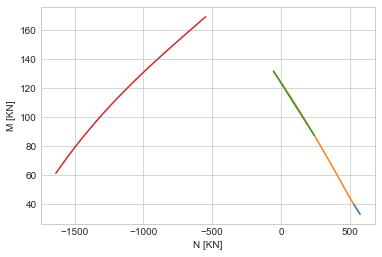

In [12]:
# Plotting the results
plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(figsize = (6,4))
ax.plot(Nrd_1*1E-3, Mrd_1*1E-6)
ax.plot(Nrd_2*1E-3, Mrd_2*1E-6)
ax.plot(Nrd_3*1E-3, Mrd_3*1E-6)
ax.plot(Nrd_4*1E-3, Mrd_4*1E-6)
ax.plot(Nrd_5*1E-3, Mrd_5*1E-6)
ax.set_xlabel("N [KN]")
ax.set_ylabel("M [KN]")
